# Vehicle price prediction

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, MinMaxScaler

## Load Dataset

In [ ]:
df = pd.read_csv('car details v4.csv')
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

## Preprocessing on dataset

In [ ]:
df.drop(columns=['Make', 'Model', 'Location', 'Color'], inplace=True)
df

,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,505000,2017,87150,Petrol,Manual,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,450000,2014,75000,Diesel,Manual,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,220000,2011,67000,Petrol,Manual,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,799000,2019,37500,Petrol,Manual,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,1950000,2018,69000,Diesel,Manual,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,2016,90300,Diesel,Manual,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,275000,2014,83000,Petrol,Manual,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,240000,2013,73000,Petrol,Manual,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,4290000,2018,60474,Diesel,Automatic,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [ ]:
df.columns = ['price', 'year', 'km', 'fuel_type', 'transmission', 'owner',
       'seller_type', 'engine', 'max_power', 'max_torque', 'drivetrain',
       'length', 'width', 'height', 'seats', 'fuel_capacity']

In [ ]:
df = df[['year', 'km', 'fuel_type', 'transmission', 'owner',
       'seller_type', 'engine', 'max_power', 'max_torque', 'drivetrain',
       'length', 'width', 'height', 'seats', 'fuel_capacity', 'price']]
df

,year,km,fuel_type,transmission,owner,seller_type,engine,max_power,max_torque,drivetrain,length,width,height,seats,fuel_capacity,price
0,2017,87150,Petrol,Manual,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,505000
1,2014,75000,Diesel,Manual,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,450000
2,2011,67000,Petrol,Manual,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,220000
3,2019,37500,Petrol,Manual,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,799000
4,2018,69000,Diesel,Manual,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,1950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2016,90300,Diesel,Manual,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0,850000
2055,2014,83000,Petrol,Manual,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0,275000
2056,2013,73000,Petrol,Manual,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0,240000
2057,2018,60474,Diesel,Automatic,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0,4290000


In [ ]:
df.isna().sum()

year               0
km                 0
fuel_type          0
transmission       0
owner              0
seller_type        0
engine            80
max_power         80
max_torque        80
drivetrain       136
length            64
width             64
height            64
seats             64
fuel_capacity    113
price              0
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)

<ipython-input-63-0bb169f49cd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


In [ ]:
def remove_additional_text1(x):
  if 'bhp' in x:
    return float(x.split(' bhp ')[0])
  else:
    return float(x.split('@')[0])

In [ ]:
df['max_power'] = df['max_power'].apply(remove_additional_text1)
df['max_power']

<ipython-input-65-9365f8bf393e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_power'] = df['max_power'].apply(remove_additional_text1)


0        87.0
1        74.0
2        79.0
3        82.0
4       148.0
        ...  
2053     85.0
2054    138.0
2055     55.0
2056     70.0
2057    188.0
Name: max_power, Length: 1874, dtype: float64

In [ ]:
def remove_additional_text2(x):
  if 'Nm' in x:
    return float(x.split(' Nm ')[0])
  else:
    return float(x.split('@')[0])

In [ ]:
df['max_torque'] = df['max_torque'].apply(remove_additional_text2)
df

<ipython-input-67-b1c46573f40a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_torque'] = df['max_torque'].apply(remove_additional_text2)


,year,km,fuel_type,transmission,owner,seller_type,engine,max_power,max_torque,drivetrain,length,width,height,seats,fuel_capacity,price
0,2017,87150,Petrol,Manual,First,Corporate,1198 cc,87.0,109.0000,FWD,3990.0,1680.0,1505.0,5.0,35.0,505000
1,2014,75000,Diesel,Manual,Second,Individual,1248 cc,74.0,190.0000,FWD,3995.0,1695.0,1555.0,5.0,42.0,450000
2,2011,67000,Petrol,Manual,First,Individual,1197 cc,79.0,112.7619,FWD,3585.0,1595.0,1550.0,5.0,35.0,220000
3,2019,37500,Petrol,Manual,First,Individual,1197 cc,82.0,113.0000,FWD,3995.0,1745.0,1510.0,5.0,37.0,799000
4,2018,69000,Diesel,Manual,First,Individual,2393 cc,148.0,343.0000,RWD,4735.0,1830.0,1795.0,7.0,55.0,1950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,2014,79000,Petrol,Manual,Second,Individual,1197 cc,85.0,113.0000,FWD,3775.0,1680.0,1620.0,5.0,43.0,245000
2054,2016,90300,Diesel,Manual,First,Individual,2179 cc,138.0,330.0000,FWD,4585.0,1890.0,1785.0,7.0,70.0,850000
2055,2014,83000,Petrol,Manual,Second,Individual,814 cc,55.0,75.0000,FWD,3495.0,1550.0,1500.0,5.0,32.0,275000
2056,2013,73000,Petrol,Manual,First,Individual,1196 cc,70.0,102.0000,FWD,3795.0,1680.0,1427.0,5.0,45.0,240000


In [ ]:
df['engine'] = df['engine'].apply(lambda x: float(x.split(' cc')[0]))
df.engine

<ipython-input-68-d09a17d07362>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine'] = df['engine'].apply(lambda x: float(x.split(' cc')[0]))


0       1198.0
1       1248.0
2       1197.0
3       1197.0
4       2393.0
         ...  
2053    1197.0
2054    2179.0
2055     814.0
2056    1196.0
2057    1995.0
Name: engine, Length: 1874, dtype: float64

### One Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns= ['fuel_type', 'transmission', 'owner', 'seller_type', 'drivetrain'])
df

,year,km,engine,max_power,max_torque,length,width,height,seats,fuel_capacity,...,owner_First,owner_Second,owner_Third,owner_UnRegistered Car,seller_type_Commercial Registration,seller_type_Corporate,seller_type_Individual,drivetrain_AWD,drivetrain_FWD,drivetrain_RWD
0,2017,87150,1198.0,87.0,109.0000,3990.0,1680.0,1505.0,5.0,35.0,...,1,0,0,0,0,1,0,0,1,0
1,2014,75000,1248.0,74.0,190.0000,3995.0,1695.0,1555.0,5.0,42.0,...,0,1,0,0,0,0,1,0,1,0
2,2011,67000,1197.0,79.0,112.7619,3585.0,1595.0,1550.0,5.0,35.0,...,1,0,0,0,0,0,1,0,1,0
3,2019,37500,1197.0,82.0,113.0000,3995.0,1745.0,1510.0,5.0,37.0,...,1,0,0,0,0,0,1,0,1,0
4,2018,69000,2393.0,148.0,343.0000,4735.0,1830.0,1795.0,7.0,55.0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,2014,79000,1197.0,85.0,113.0000,3775.0,1680.0,1620.0,5.0,43.0,...,0,1,0,0,0,0,1,0,1,0
2054,2016,90300,2179.0,138.0,330.0000,4585.0,1890.0,1785.0,7.0,70.0,...,1,0,0,0,0,0,1,0,1,0
2055,2014,83000,814.0,55.0,75.0000,3495.0,1550.0,1500.0,5.0,32.0,...,0,1,0,0,0,0,1,0,1,0
2056,2013,73000,1196.0,70.0,102.0000,3795.0,1680.0,1427.0,5.0,45.0,...,1,0,0,0,0,0,1,0,1,0


## Train Test Split

In [ ]:
train_set , test_set = train_test_split(df, test_size=0.2)
train_set

,year,km,engine,max_power,max_torque,length,width,height,seats,fuel_capacity,...,owner_First,owner_Second,owner_Third,owner_UnRegistered Car,seller_type_Commercial Registration,seller_type_Corporate,seller_type_Individual,drivetrain_AWD,drivetrain_FWD,drivetrain_RWD
1038,2009,56852,796.0,39.0,54.0,3495.0,1475.0,1460.0,5.0,35.0,...,0,1,0,0,0,0,1,0,1,0
1168,2018,50000,1497.0,117.0,145.0,4440.0,1695.0,1495.0,5.0,40.0,...,1,0,0,0,0,0,1,0,1,0
1872,2021,6600,1197.0,82.0,114.0,3805.0,1680.0,1520.0,5.0,37.0,...,1,0,0,0,0,0,1,0,1,0
417,2022,2670,1497.0,113.0,144.0,4300.0,1790.0,1635.0,5.0,50.0,...,1,0,0,0,0,0,1,0,1,0
1755,2015,60798,1373.0,91.0,130.0,4490.0,1730.0,1485.0,5.0,43.0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,2017,27000,1186.0,74.0,190.0,3995.0,1660.0,1520.0,5.0,43.0,...,0,1,0,0,0,0,1,0,1,0
1900,2016,40000,1968.0,174.0,380.0,4385.0,1831.0,1608.0,5.0,64.0,...,1,0,0,0,0,0,1,1,0,0
433,2011,78000,2497.0,204.0,245.0,4868.0,1854.0,1471.0,5.0,80.0,...,0,1,0,0,0,0,1,0,0,1
1377,2020,28600,1798.0,170.0,320.0,4701.0,1826.0,1427.0,5.0,63.0,...,1,0,0,0,0,0,1,0,1,0


## EDA

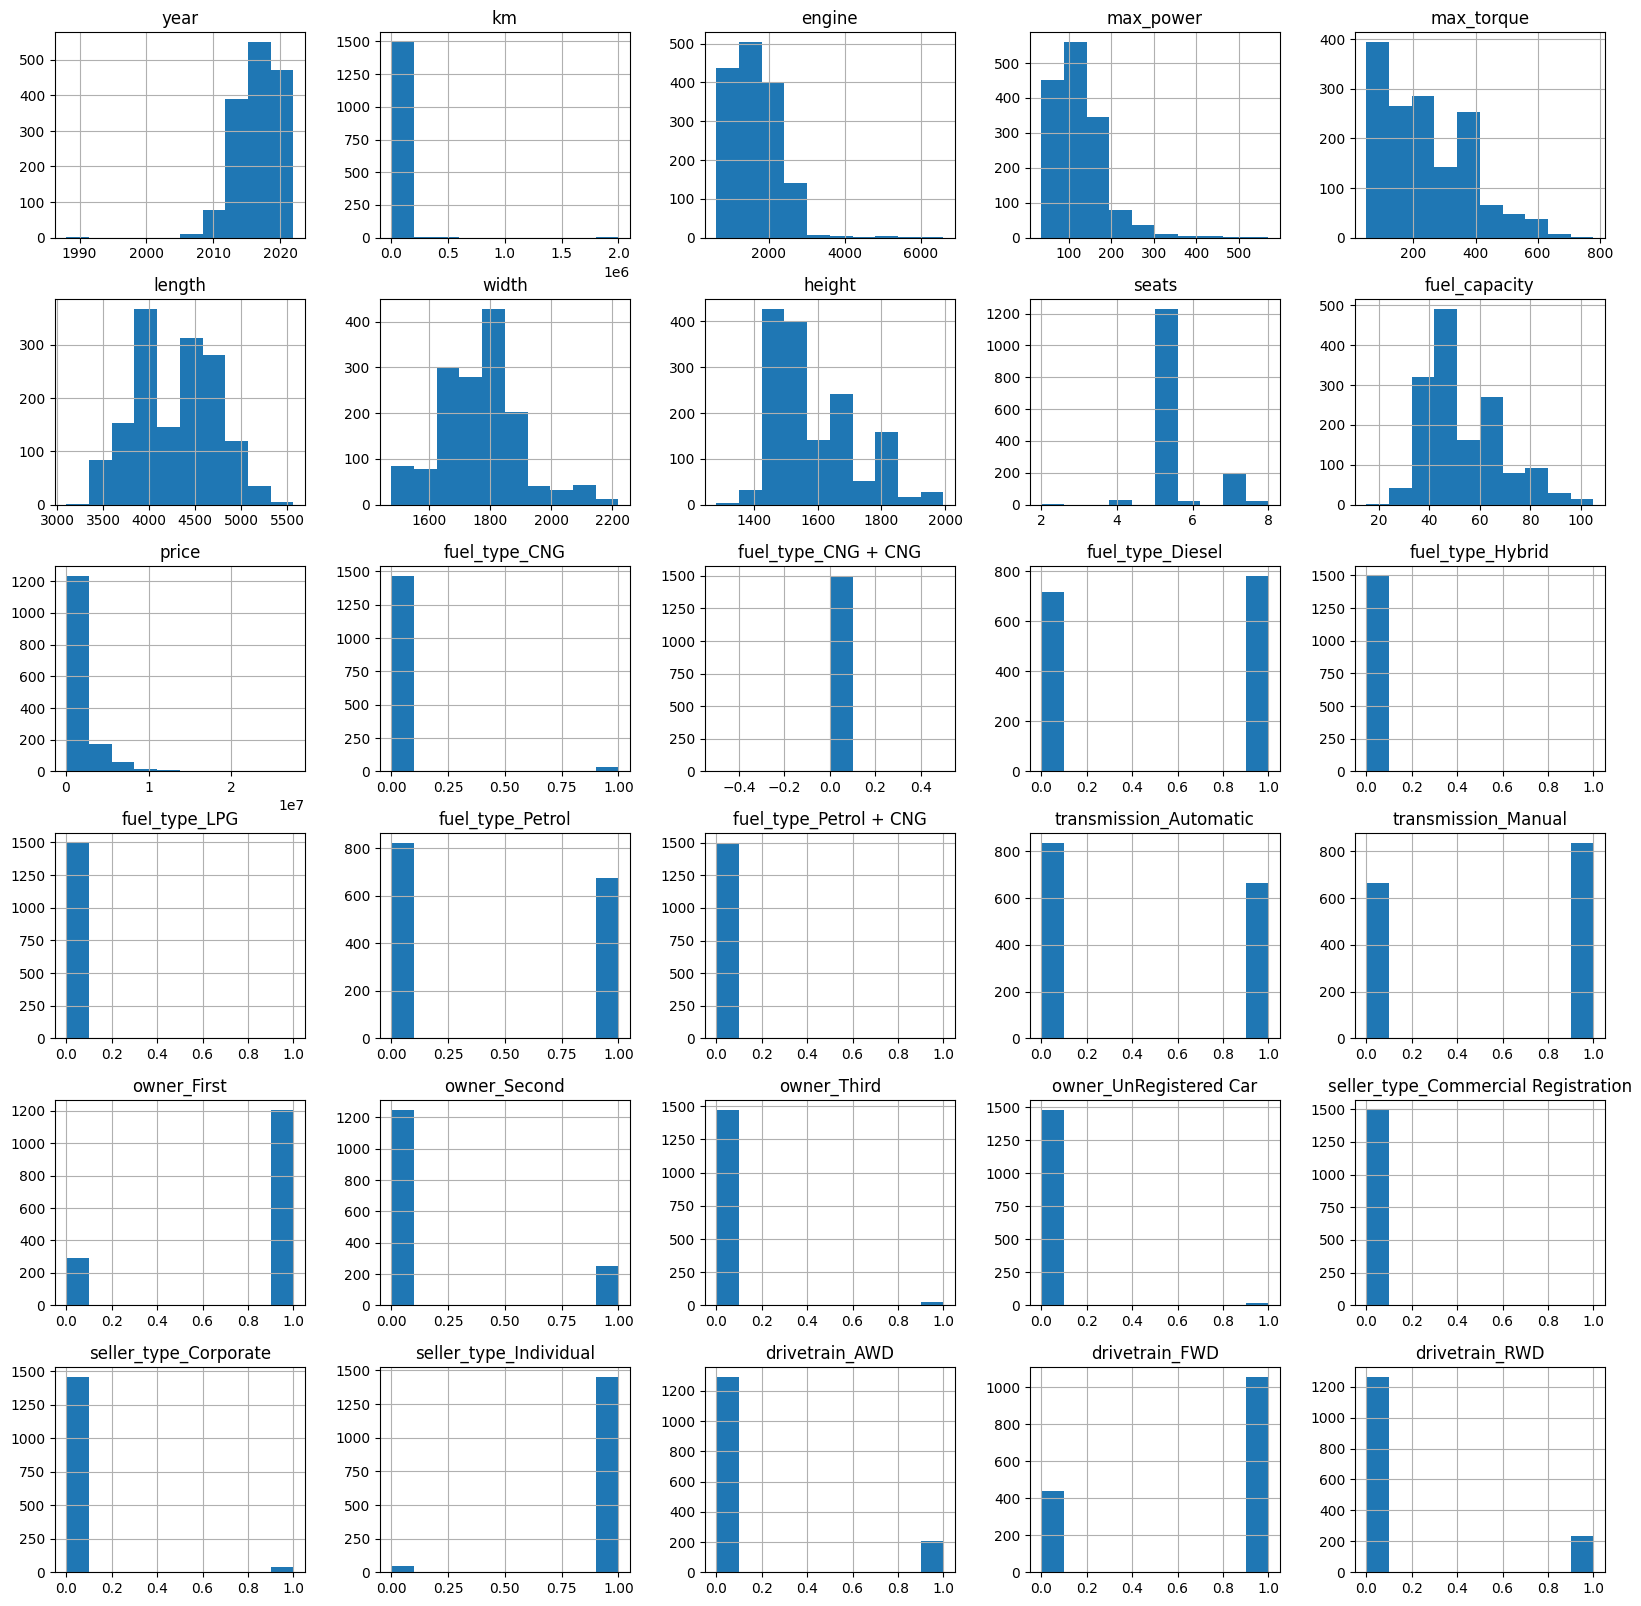

In [ ]:
train_set.hist(figsize=(20, 20));

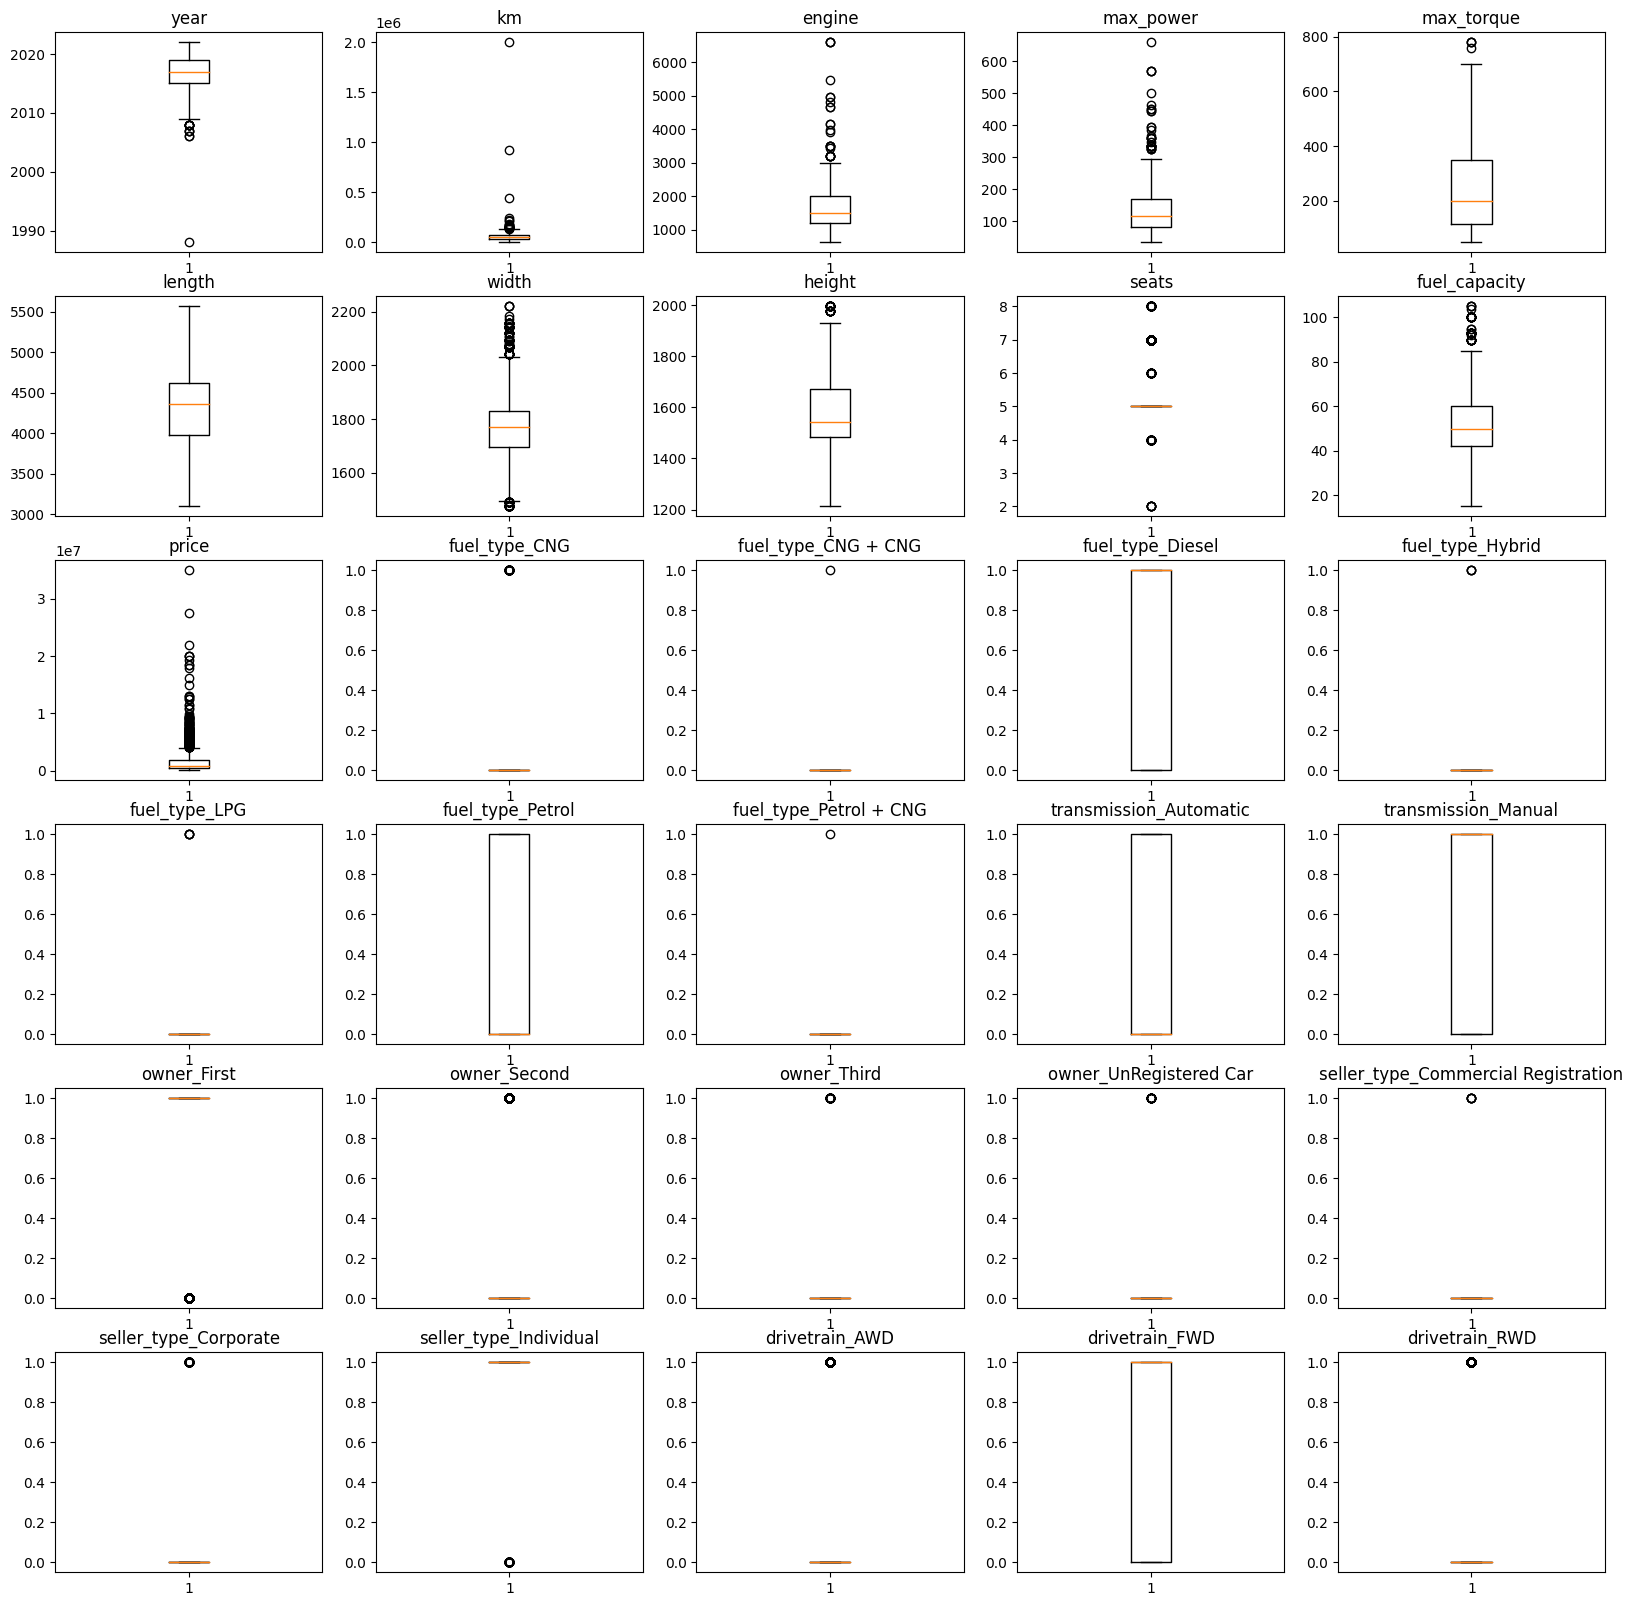

In [ ]:
fig, axes = plt.subplots(6, 5, figsize=(20, 20))
axes_flatten = axes.flatten()

for i, col in enumerate(df.columns):
  ax = axes_flatten[i]
  ax.boxplot(df[col])
  ax.set_title(col)

In [ ]:
corr = df.corr()
corr

,year,km,engine,max_power,max_torque,length,width,height,seats,fuel_capacity,...,owner_First,owner_Second,owner_Third,owner_UnRegistered Car,seller_type_Commercial Registration,seller_type_Corporate,seller_type_Individual,drivetrain_AWD,drivetrain_FWD,drivetrain_RWD
year,1.000000,-0.291740,-0.018577,0.100106,0.091374,0.085178,0.182220,0.126849,-0.000113,0.044859,...,0.297776,-0.273989,-0.214645,0.120591,0.017911,0.036099,-0.039890,0.065941,-0.059614,0.012738
km,-0.291740,1.000000,0.055978,-0.032919,0.040276,0.037817,0.008479,0.085728,0.111103,0.052447,...,-0.101653,0.107492,0.049845,-0.065010,-0.001412,-0.024733,0.024096,0.006462,-0.006933,0.002602
engine,-0.018577,0.055978,1.000000,0.870830,0.856085,0.799832,0.714352,0.351523,0.341761,0.798873,...,-0.139817,0.091707,0.133505,0.044149,-0.039753,0.087216,-0.071646,0.461198,-0.717167,0.461895
max_power,0.100106,-0.032919,0.870830,1.000000,0.880321,0.800766,0.745329,0.125249,0.071461,0.775993,...,-0.085755,0.037011,0.093008,0.087162,-0.043445,0.123316,-0.105103,0.473536,-0.657541,0.376386
max_torque,0.091374,0.040276,0.856085,0.880321,1.000000,0.823429,0.820362,0.294962,0.235450,0.853057,...,-0.101426,0.077006,0.039907,0.064766,-0.031209,0.084446,-0.071539,0.543080,-0.729419,0.401005
length,0.085178,0.037817,0.799832,0.800766,0.823429,1.000000,0.797228,0.194704,0.298527,0.809812,...,-0.079829,0.057578,0.032500,0.061294,-0.048213,0.091147,-0.072889,0.344471,-0.587342,0.409175
width,0.182220,0.008479,0.714352,0.745329,0.820362,0.797228,1.000000,0.326928,0.229056,0.791316,...,-0.039968,0.026271,0.022290,0.032834,-0.032097,0.071115,-0.058514,0.499766,-0.609748,0.292660
height,0.126849,0.085728,0.351523,0.125249,0.294962,0.194704,0.326928,1.000000,0.695373,0.408717,...,-0.025177,0.044934,-0.009920,-0.058268,0.004931,-0.028324,0.025644,0.416522,-0.459939,0.184003
seats,-0.000113,0.111103,0.341761,0.071461,0.235450,0.298527,0.229056,0.695373,1.000000,0.313928,...,-0.052865,0.071853,-0.015033,-0.042801,0.006726,-0.038460,0.034812,0.151629,-0.366839,0.314597
fuel_capacity,0.044859,0.052447,0.798873,0.775993,0.853057,0.809812,0.791316,0.408717,0.313928,1.000000,...,-0.098130,0.082983,0.037960,0.030701,-0.024619,0.060709,-0.050780,0.545749,-0.715082,0.380721


<Axes: >

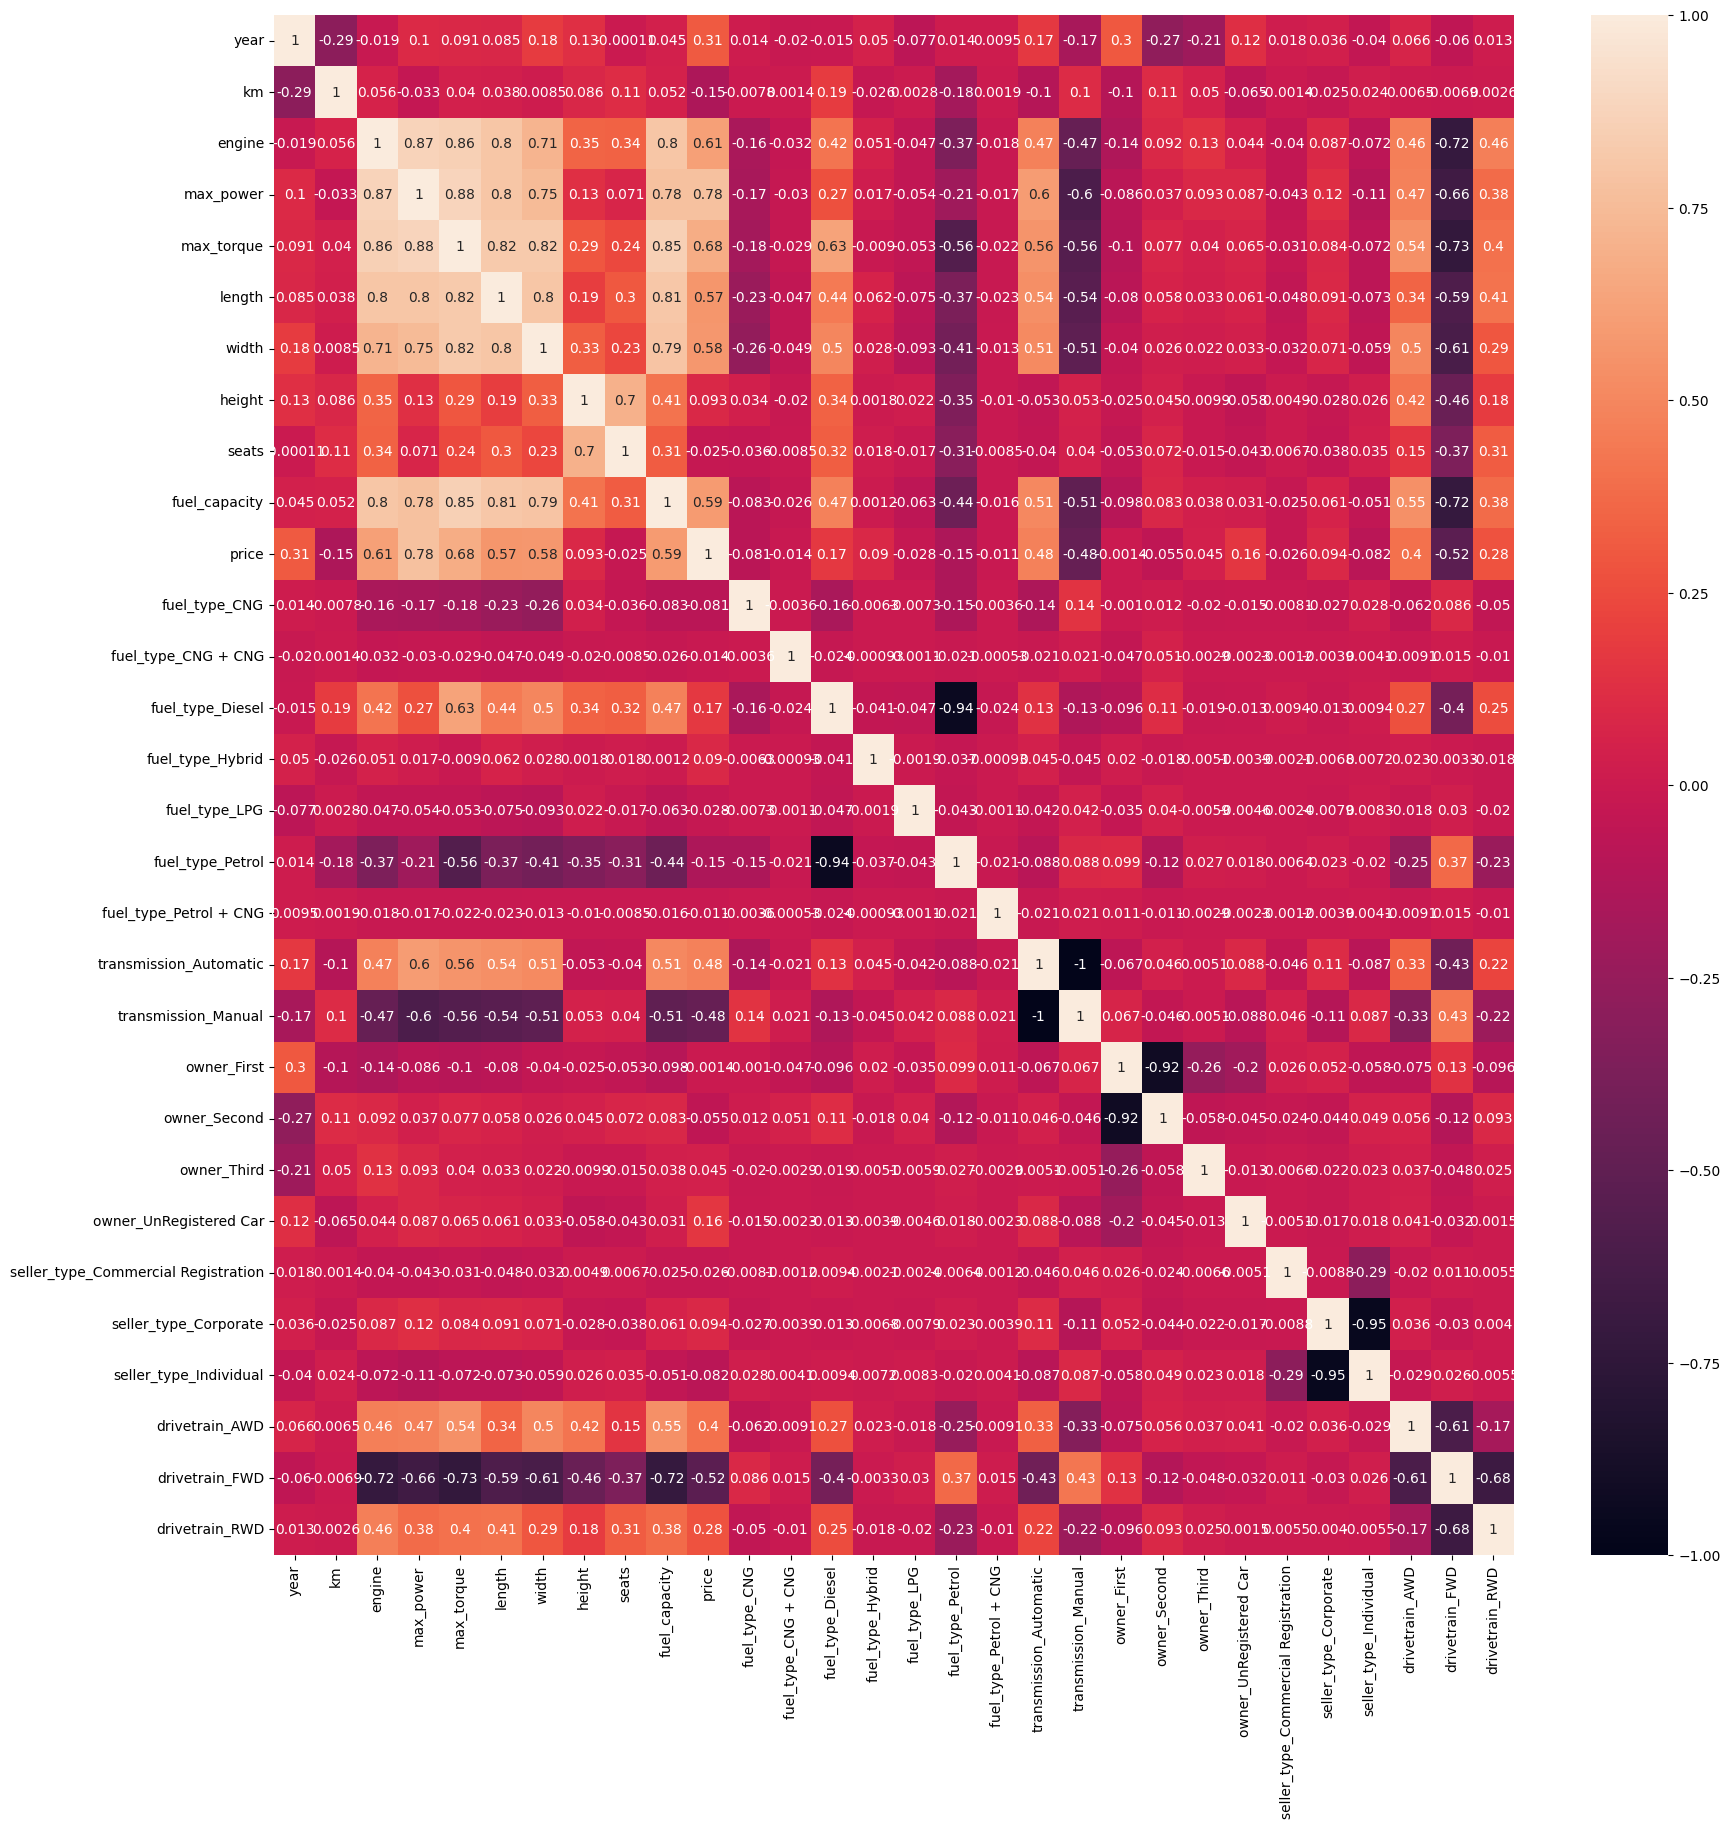

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)

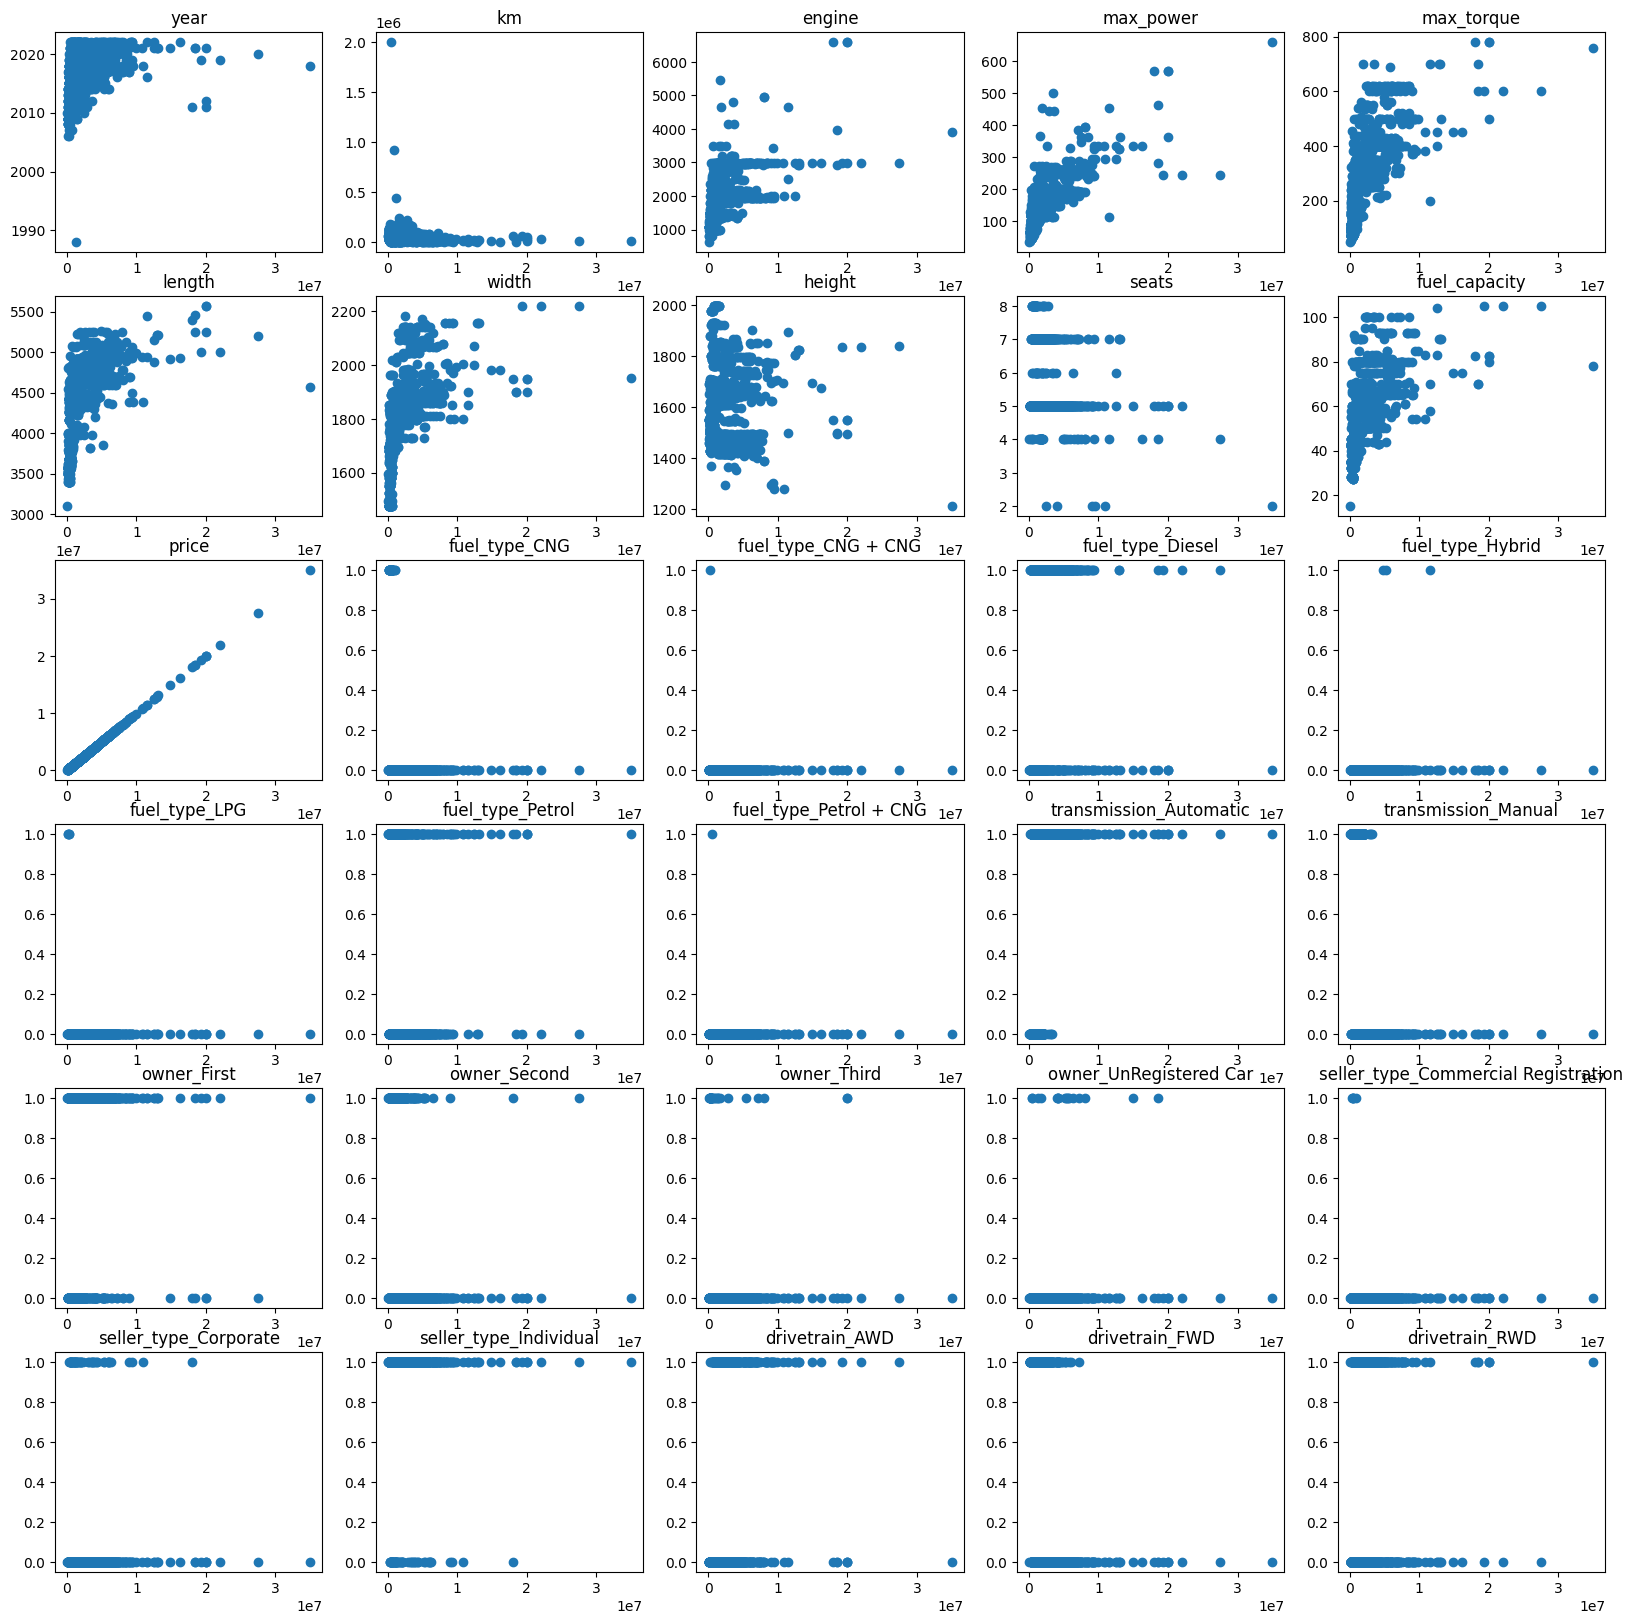

In [ ]:
fig, axes = plt.subplots(6, 5, figsize=(20, 20))
axes_flatten = axes.flatten()

for i, col in enumerate(df.columns):
  ax = axes_flatten[i]
  ax.scatter(df['price'], df[col])
  ax.set_title(col)

## Outliers

In [ ]:
cols = ['year', 'km', 'engine', 'max_power', 'max_torque',
       'length', 'width', 'height', 'seats', 'fuel_capacity', 'price']
desc = train_set[cols].describe()
Q1 = desc.loc['25%']
Q3 = desc.loc['75%']
IQR = Q3 - Q1

upper_case = Q3 + (1.5 * IQR)
lower_case = Q1 - (1.5 * IQR)

flags = (train_set[cols] > upper_case) | (train_set[cols] < lower_case)
flags.sum()

year              11
km                28
engine            14
max_power         22
max_torque         8
length             1
width            131
height            26
seats            281
fuel_capacity     38
price            169
dtype: int64

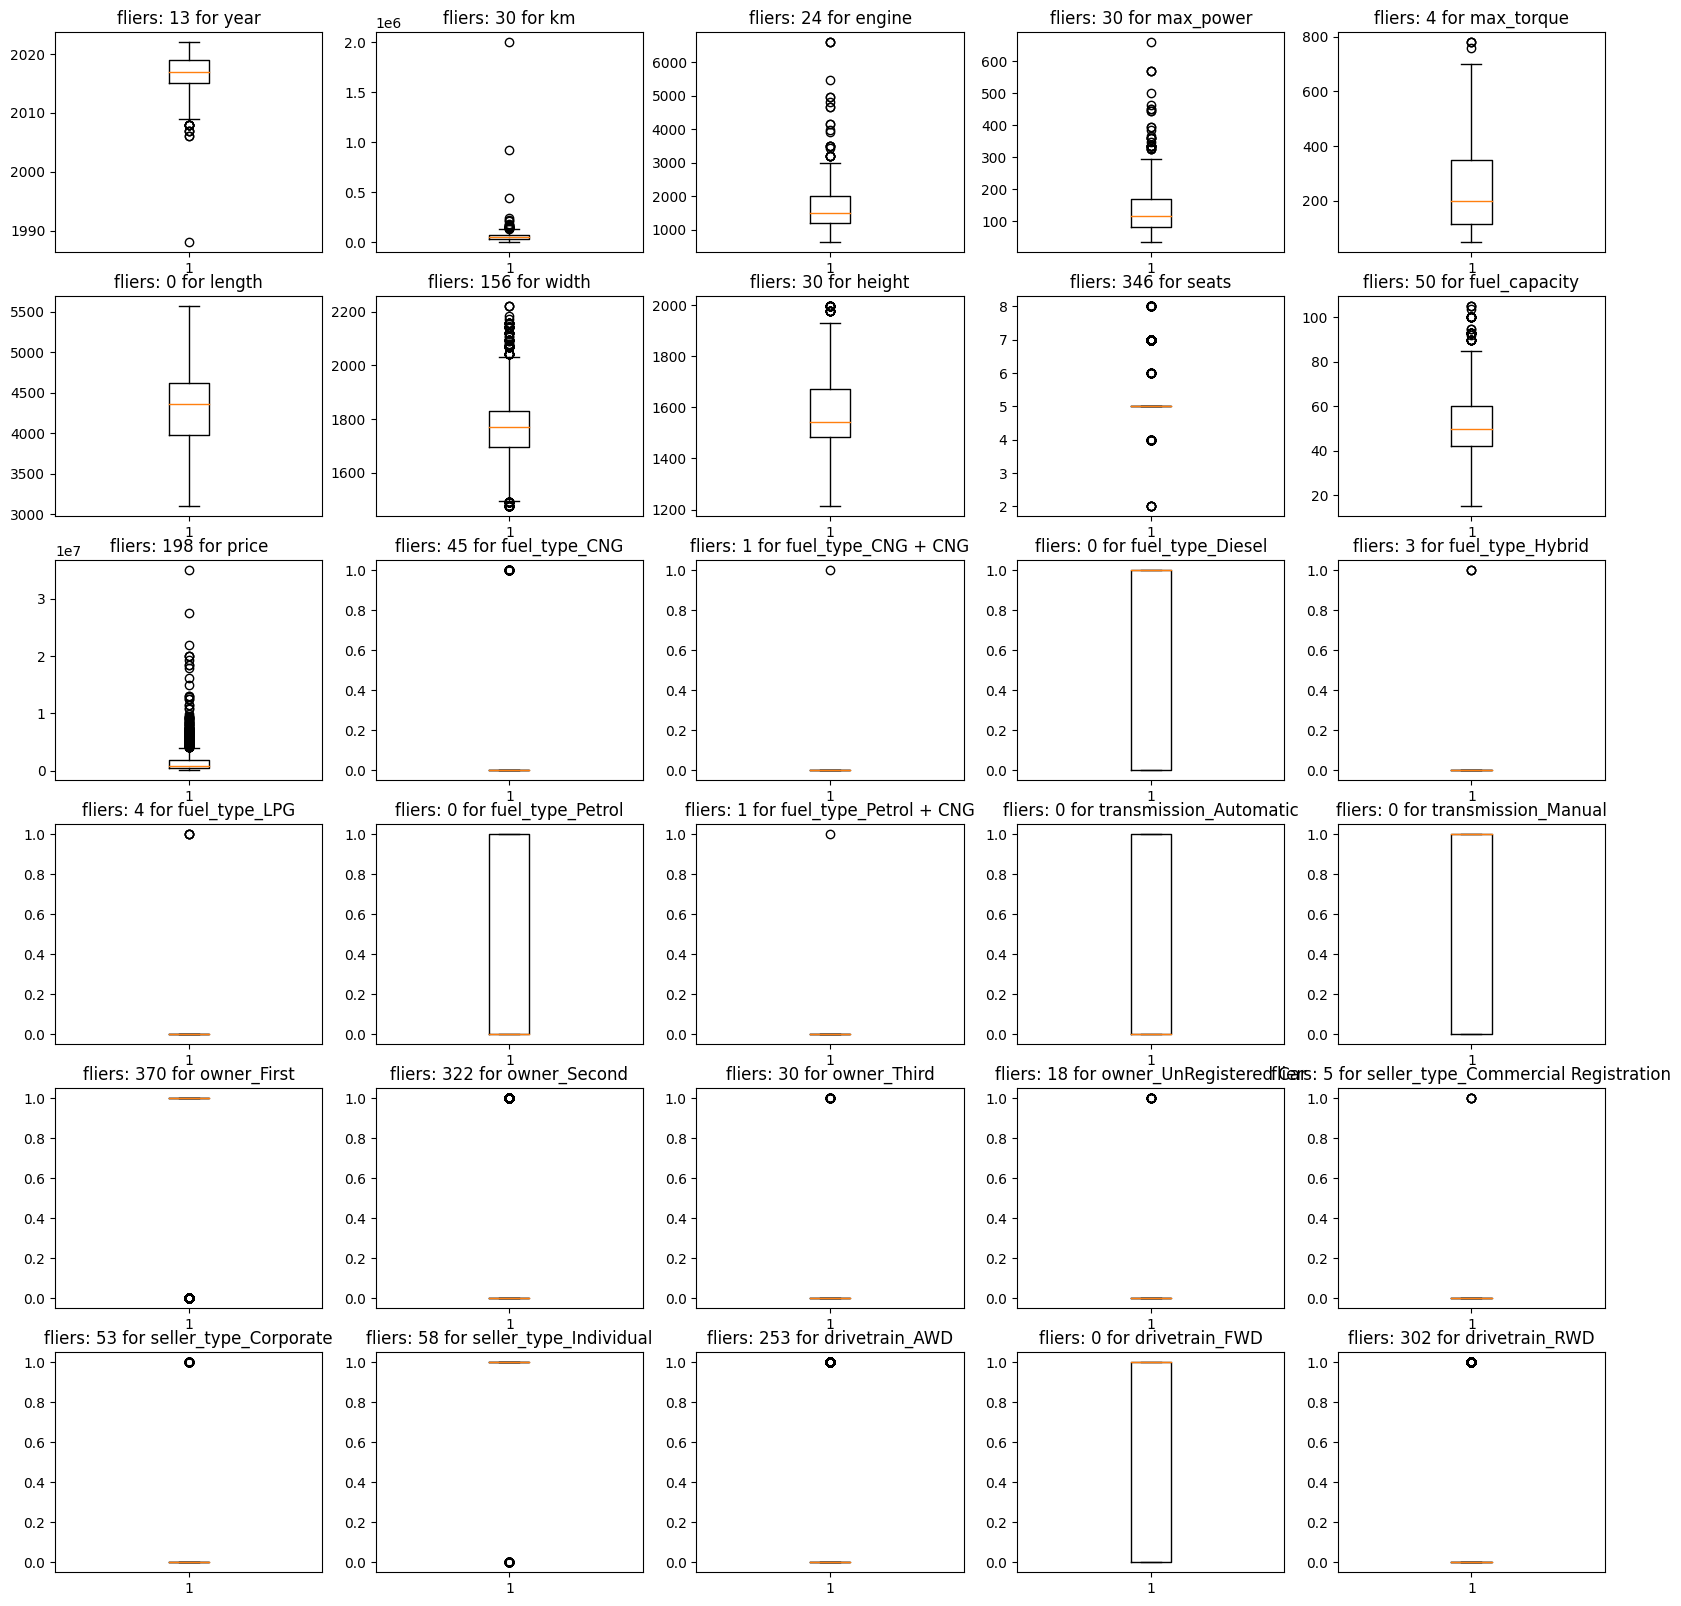

In [ ]:
fig, axes = plt.subplots(6, 5, figsize=(20, 20))
axes_flatten = axes.flatten()

for i, col in enumerate(df.columns):
  ax = axes_flatten[i]
  fliers = ax.boxplot(df[col])['fliers'][0].get_ydata()
  ax.set_title(f'fliers: {len(fliers)} for {col}')

### Handling Outliers

In [ ]:
pt = PowerTransformer(standardize=False)
train_set[cols] = pt.fit_transform(train_set[cols])

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


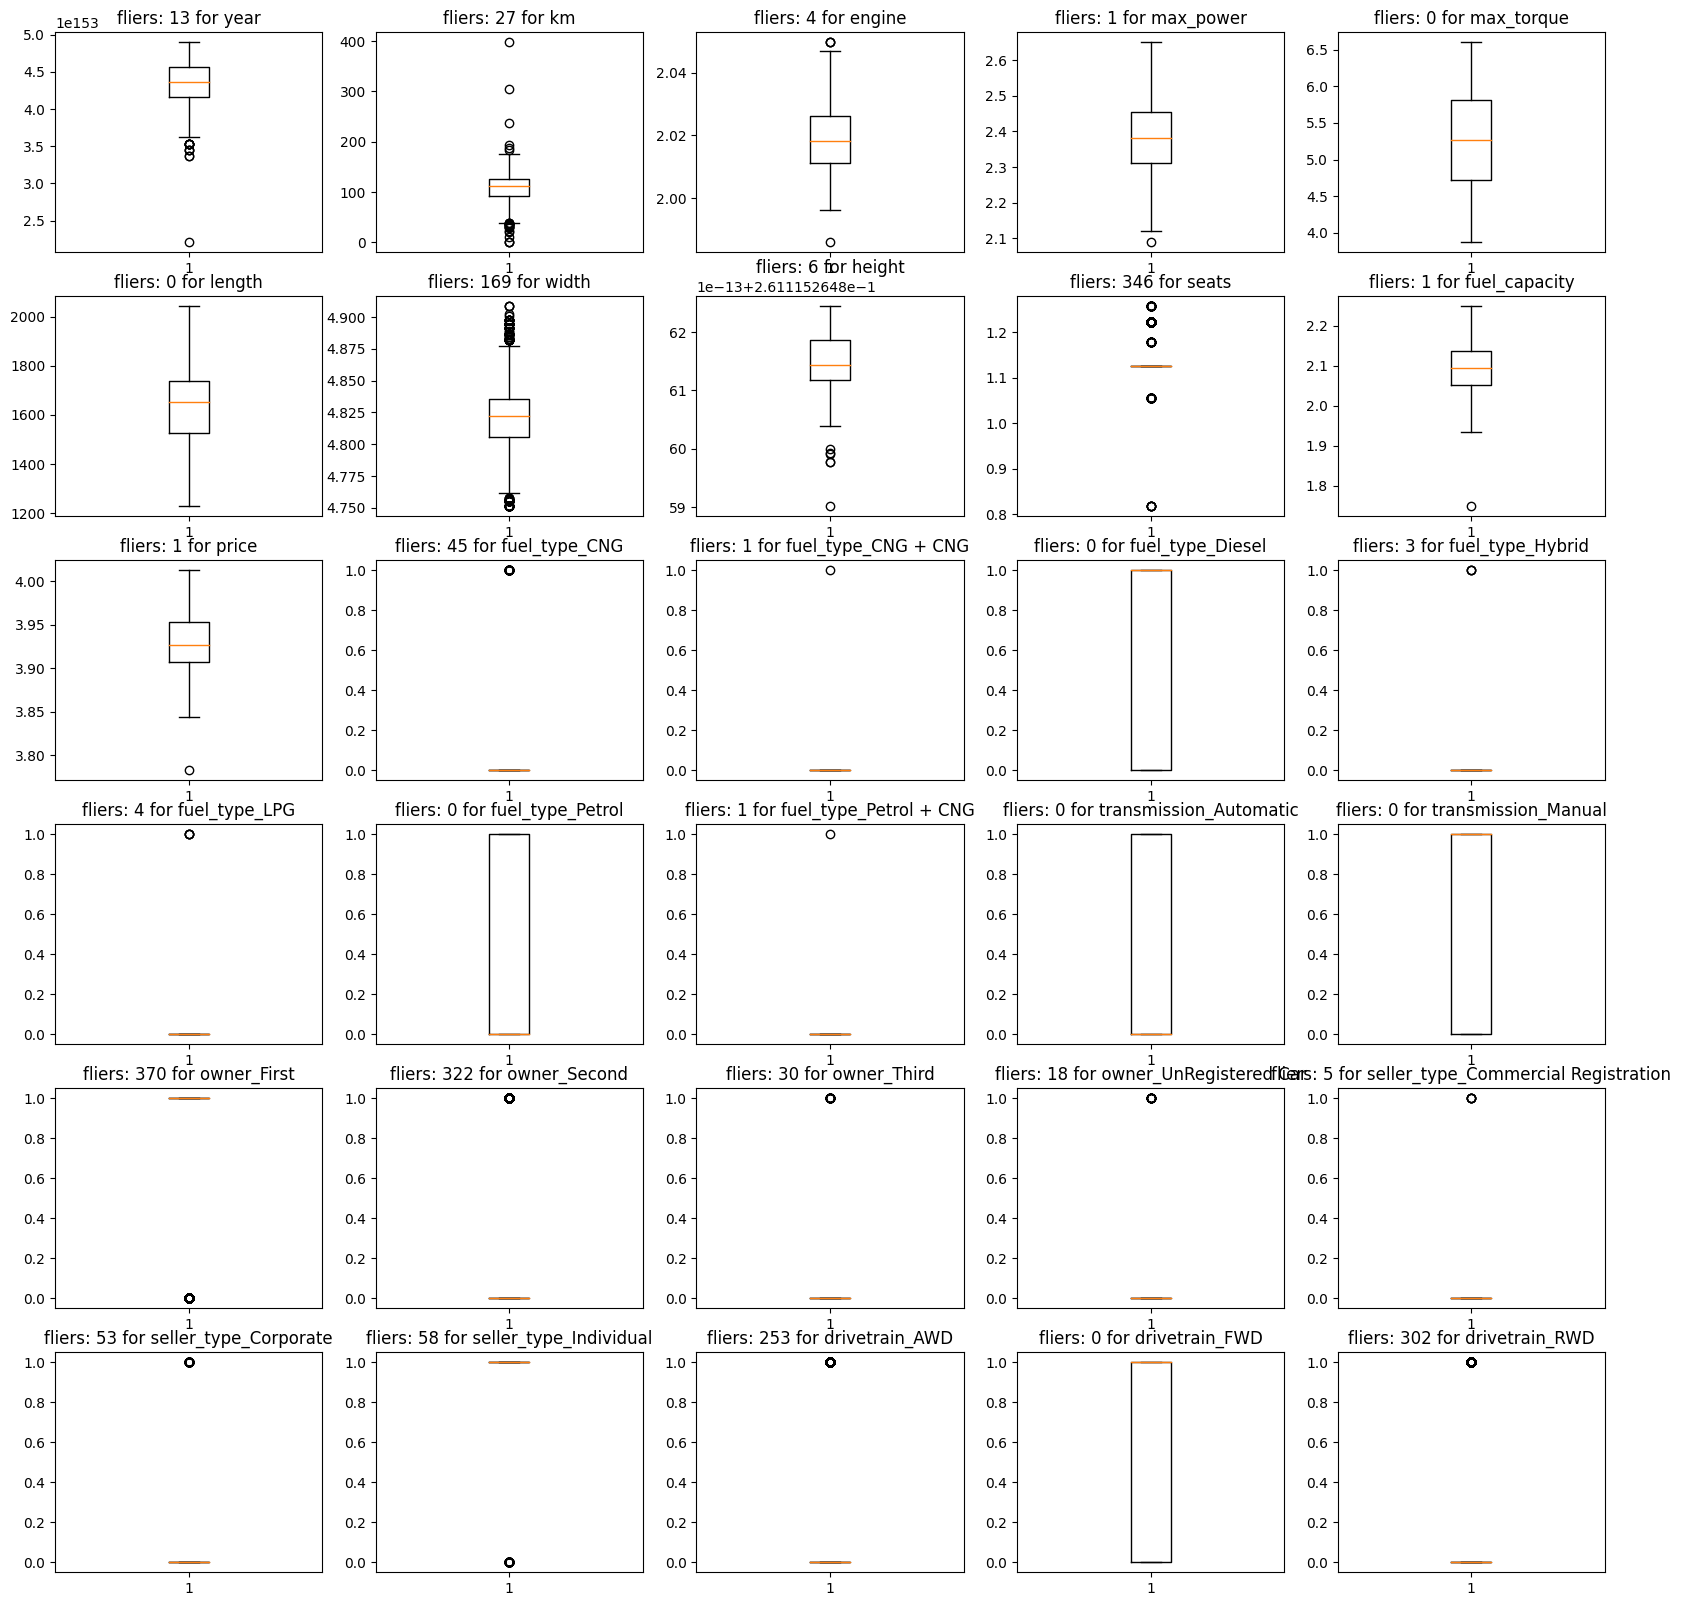

In [ ]:
fig, axes = plt.subplots(6, 5, figsize=(20, 20))
axes_flatten = axes.flatten()

for i, col in enumerate(df.columns):
  ax = axes_flatten[i]
  fliers = ax.boxplot(df[col])['fliers'][0].get_ydata()
  ax.set_title(f'fliers: {len(fliers)} for {col}')

array([[<Axes: title={'center': 'year'}>, <Axes: title={'center': 'km'}>,
        <Axes: title={'center': 'engine'}>,
        <Axes: title={'center': 'max_power'}>,
        <Axes: title={'center': 'max_torque'}>],
       [<Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'seats'}>,
        <Axes: title={'center': 'fuel_capacity'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'fuel_type_CNG'}>,
        <Axes: title={'center': 'fuel_type_CNG + CNG'}>,
        <Axes: title={'center': 'fuel_type_Diesel'}>,
        <Axes: title={'center': 'fuel_type_Hybrid'}>],
       [<Axes: title={'center': 'fuel_type_LPG'}>,
        <Axes: title={'center': 'fuel_type_Petrol'}>,
        <Axes: title={'center': 'fuel_type_Petrol + CNG'}>,
        <Axes: title={'center': 'transmission_Automatic'}>,
        <Axes: title={'center': 'transmission_Manual'}>],
       [<Axes: ti

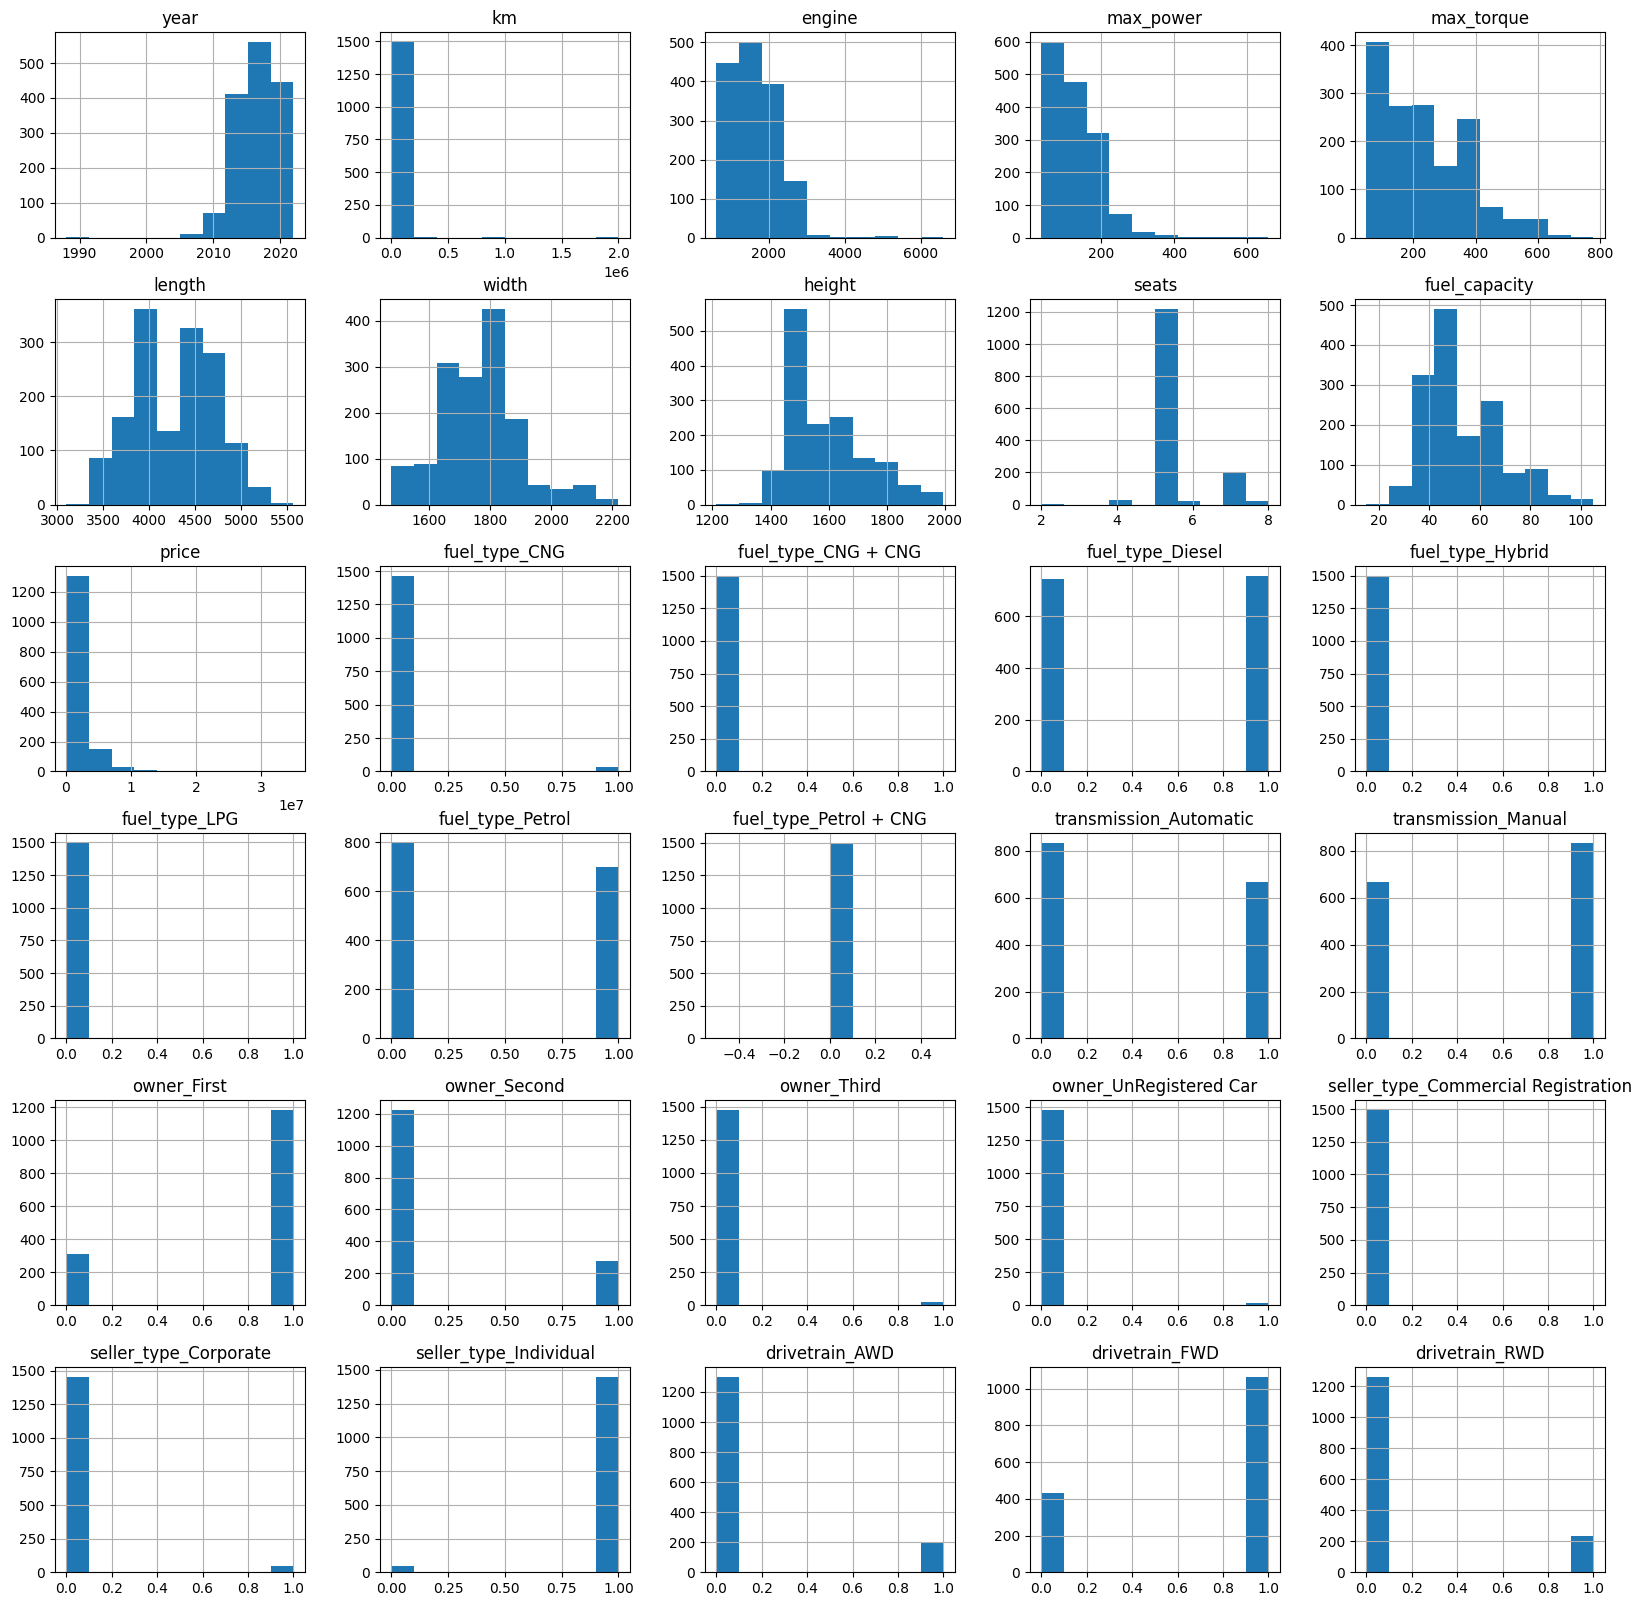

In [ ]:
train_set.hist(figsize=(20, 20))

## Normalization

In [ ]:
normz = MinMaxScaler()
train_set_normz = normz.fit_transform(train_set)
train_set_normz

array([[0.52397337, 0.31678321, 0.16844735, ..., 0.        , 1.        ,
        0.        ],
       [0.83823702, 0.30374641, 0.51779975, ..., 0.        , 1.        ,
        0.        ],
       [0.95816822, 0.15509806, 0.40700744, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.58833471, 0.35124171, 0.72755365, ..., 0.        , 0.        ,
        1.        ],
       [0.91727753, 0.25282604, 0.59941565, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.11434444, 0.51779975, ..., 0.        , 1.        ,
        0.        ]])

## Split x and y from train_set

In [ ]:
y_train = train_set_normz[:, [10]]
x_train = np.delete(train_set_normz, 10, axis=1)
x_train.shape, y_train.shape

((1499, 29), (1499, 1))

## Model

In [ ]:
model = KNeighborsRegressor(n_neighbors=8, weights='distance')
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=8, weights='distance')

## Test

### Feature transform

In [ ]:
test_set[cols] = pt.transform(test_set[cols])
test_set

,year,km,engine,max_power,max_torque,length,width,height,seats,fuel_capacity,...,owner_First,owner_Second,owner_Third,owner_UnRegistered Car,seller_type_Commercial Registration,seller_type_Corporate,seller_type_Individual,drivetrain_AWD,drivetrain_FWD,drivetrain_RWD
1757,5.114296e+153,67.207908,1.872717,2.262280,4.499111,1646.080324,4.459869,0.254915,1.281511,2.010856,...,1,0,0,0,0,0,1,0,1,0
1091,4.881601e+153,79.568372,1.881848,2.301614,5.182781,1740.268431,4.484536,0.254915,1.414833,2.084610,...,1,0,0,0,0,0,1,0,0,1
964,4.769172e+153,111.905030,1.868530,2.175607,4.716070,1502.366735,4.459869,0.254915,1.281511,2.022685,...,1,0,0,0,0,0,1,0,1,0
1784,5.357836e+153,41.877449,1.878589,2.303763,5.128483,1499.113113,4.482781,0.254915,1.188771,2.092388,...,1,0,0,0,0,0,1,1,0,0
157,4.881601e+153,91.564856,1.884181,2.326854,5.393784,1759.326644,4.488873,0.254915,1.414833,2.161537,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,4.551864e+153,113.593614,1.868530,2.175607,4.716070,1502.366735,4.459869,0.254915,1.281511,2.022685,...,1,0,0,0,0,0,1,0,1,0
583,5.114296e+153,47.552549,1.872703,2.257729,4.994959,1445.593618,4.465916,0.254915,1.281511,2.033782,...,1,0,0,0,0,0,1,0,1,0
825,4.769172e+153,96.387912,1.867513,2.198640,4.311419,1455.079705,4.459869,0.254915,1.281511,2.022685,...,1,0,0,0,0,0,1,0,1,0
331,4.881601e+153,94.712481,1.867513,2.239546,4.650279,1628.106334,4.460632,0.254915,1.281511,2.084610,...,1,0,0,0,0,0,1,0,1,0


### Normalization

In [ ]:
test_set_normz = normz.transform(test_set)
test_set_normz

array([[0.87730722, 0.21694022, 0.51779975, ..., 0.        , 1.        ,
        0.        ],
       [0.80004707, 0.25683852, 0.71216587, ..., 0.        , 0.        ,
        1.        ],
       [0.76271798, 0.36121793, 0.42866868, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.76271798, 0.31113027, 0.40700744, ..., 0.        , 1.        ,
        0.        ],
       [0.80004707, 0.30572215, 0.40700744, ..., 0.        , 1.        ,
        0.        ],
       [0.69056678, 0.32928456, 0.42866868, ..., 0.        , 1.        ,
        0.        ]])

### Split x and y from test_set

In [ ]:
y_test = test_set_normz[:, [10]]
x_test = np.delete(test_set_normz, 10, axis=1)
x_test.shape, y_test.shape

((375, 29), (375, 1))

R2 Score

In [ ]:
model.score(x_test, y_test)

0.9012244235346851